# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [28]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [29]:
#Test URL with 1 city
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
city = "London"
city_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
city_weather  = requests.get(city_url).json()
print(city_weather)

{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 9.44, 'feels_like': 7.26, 'temp_min': 6.92, 'temp_max': 10.86, 'pressure': 1000, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 240}, 'clouds': {'all': 11}, 'dt': 1699297346, 'sys': {'type': 2, 'id': 2075535, 'country': 'GB', 'sunrise': 1699254124, 'sunset': 1699287969}, 'timezone': 0, 'id': 2643743, 'name': 'London', 'cod': 200}


In [30]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []
c_name = []
c_lat = []
c_lng = []
c_max_temp = []
c_humidity = []
c_clouds = []
c_wind = []
c_country = [] 
c_date = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather  = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        c_name.append(city_weather['name'])
        c_lat.append(city_weather['coord']['lat'])
        c_lng.append(city_weather['coord']['lon'])
        c_max_temp.append(city_weather['main']['temp_max'])
        c_humidity.append(city_weather['main']['humidity'])
        c_clouds.append(city_weather['clouds']['all'])
        c_wind.append(city_weather['wind']['speed'])
        c_country.append(city_weather['sys']['country'])
        c_date.append(city_weather['dt'])

        # Append the City information into city_data list
        city_data_dict = ({"City": c_name, 
                          "Lat": c_lat, 
                          "Lng": c_lng, 
                          "Max Temp": c_max_temp,
                          "Humidity": c_humidity,
                          "Cloudiness": c_clouds,
                          "Wind Speed": c_wind,
                          "Country": c_country,
                          "Date": c_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | klyuchi
Processing Record 2 of Set 1 | college
Processing Record 3 of Set 1 | lagoa vermelha
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | yung shue wan
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | laojunmiao
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | coahuayana de hidalgo
Processing Record 10 of Set 1 | san patricio
Processing Record 11 of Set 1 | onega
Processing Record 12 of Set 1 | ad dabbah
Processing Record 13 of Set 1 | taoudenni
Processing Record 14 of Set 1 | isafjordur
Processing Record 15 of Set 1 | tangalle
Processing Record 16 of Set 1 | minas de marcona
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | colby
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 1 | zhengjia

In [31]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data_dict)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [32]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Klyuchi,52.2667,79.1667,-1.37,68,100,4.41,RU,1699297927
1,College,64.8569,-147.8028,-7.03,88,100,0.00,US,1699297927
2,Lagoa Vermelha,-28.2086,-51.5258,24.61,56,0,0.39,BR,1699297928
3,Adamstown,-25.0660,-130.1015,22.95,78,100,7.04,PN,1699297928
4,Yung Shue Wan,22.2333,114.1167,26.46,58,12,3.74,HK,1699297928


In [34]:
# Export the City_Data into a csv
city_data_df.to_csv("../WeatherPy/cities.csv", index_label="City_ID")

In [35]:
# Read saved data
city_data_df = pd.read_csv("../WeatherPy/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Klyuchi,52.2667,79.1667,-1.37,68,100,4.41,RU,1699297927
1,College,64.8569,-147.8028,-7.03,88,100,0.00,US,1699297927
2,Lagoa Vermelha,-28.2086,-51.5258,24.61,56,0,0.39,BR,1699297928
3,Adamstown,-25.0660,-130.1015,22.95,78,100,7.04,PN,1699297928
4,Yung Shue Wan,22.2333,114.1167,26.46,58,12,3.74,HK,1699297928


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

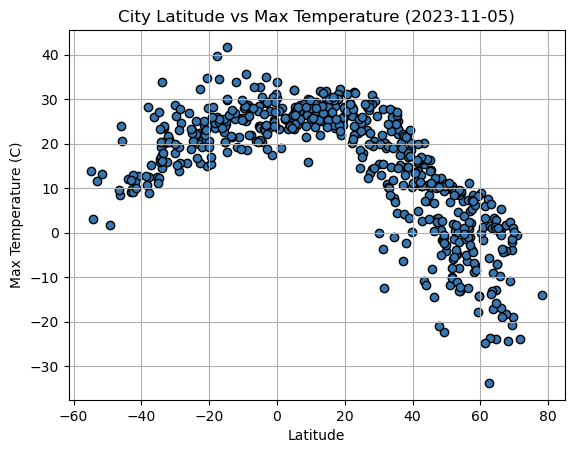

In [36]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolor = "#3677b2", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (2023-11-05)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../WeatherPy//Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

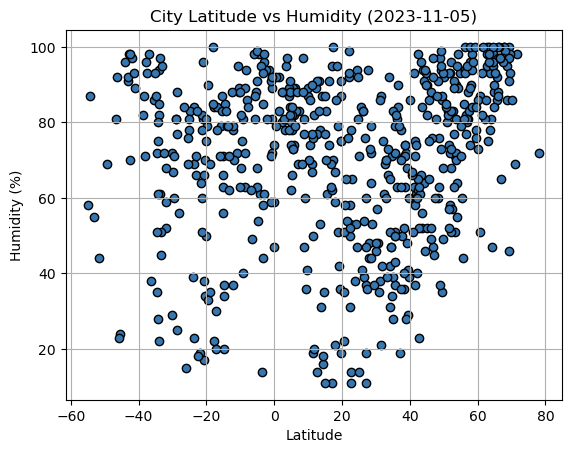

In [37]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolor = "#3677b2", edgecolors="black")
# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (2023-11-05)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../WeatherPy/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

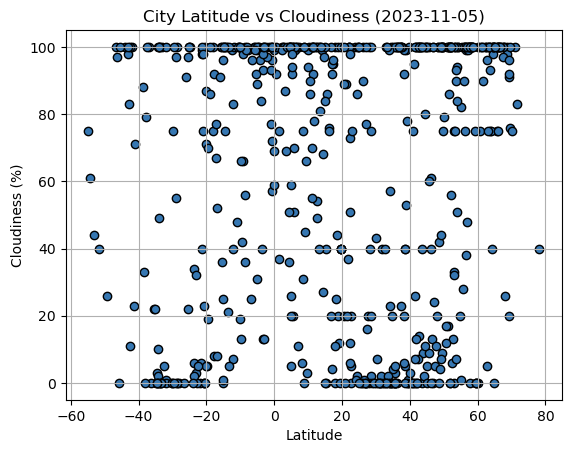

In [38]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolor = "#3677b2", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2023-11-05)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../WeatherPy/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

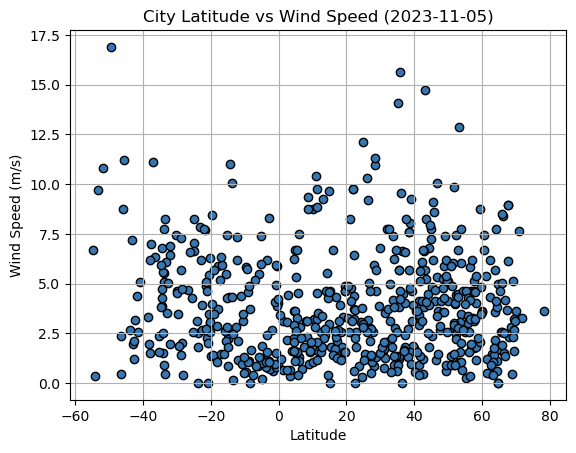

In [39]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolor = "#3677b2", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2023-11-05)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../WeatherPy/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [40]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Klyuchi,52.2667,79.1667,-1.37,68,100,4.41,RU,1699297927
1,College,64.8569,-147.8028,-7.03,88,100,0.00,US,1699297927
4,Yung Shue Wan,22.2333,114.1167,26.46,58,12,3.74,HK,1699297928
6,Laojunmiao,39.8333,97.7333,0.07,39,100,1.75,CN,1699297928
8,Coahuayana de Hidalgo,18.7000,-103.6583,32.30,51,20,1.73,MX,1699297929


In [41]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df['Lat'] < 0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,Lagoa Vermelha,-28.2086,-51.5258,24.61,56,0,0.39,BR,1699297928
3,Adamstown,-25.0660,-130.1015,22.95,78,100,7.04,PN,1699297928
5,Arraial do Cabo,-22.9661,-42.0278,22.43,66,3,6.18,BR,1699297765
7,Grytviken,-54.2811,-36.5092,2.99,87,61,0.37,GS,1699297928
15,Minas de Marcona,-15.2119,-75.1103,20.30,56,25,7.43,PE,1699297785


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8348127609956557
The r-squared is: 0.6969123459211898


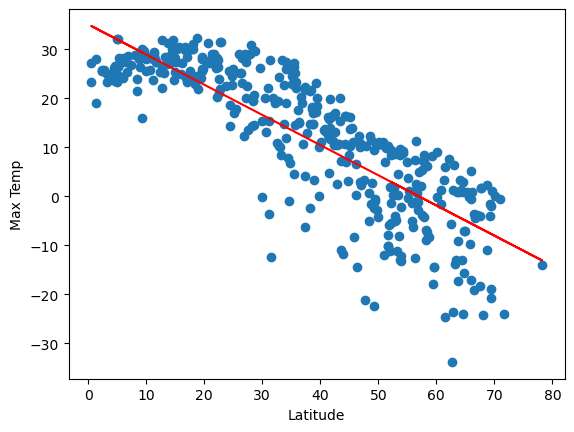

In [42]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(5.8,250.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-value is: 0.6511214955025942
The r-squared is: 0.4239592019055348


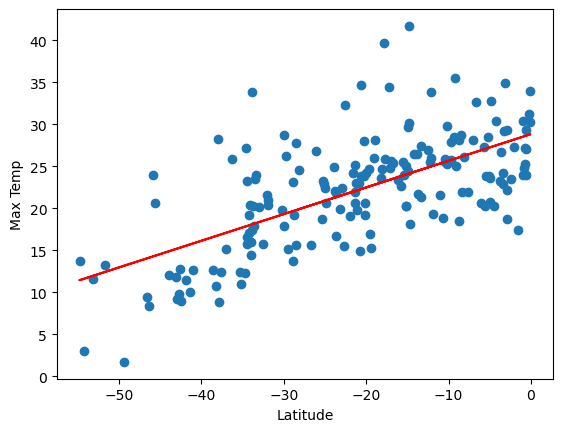

In [43]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
plt.plot(southern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-25.8,280.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:**
In the Northern Hemisphere, as the Latitude increases, the Temperature decreases. This is because we are moving away from the Equator (x = 0).
In the Southern Hemisphere, as the Latitiude increases (as a negative number), the Temperature decreases. There is a relationship between Latitude and Max Temperature. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2672069910373482
The r-squared is: 0.07139957605923347


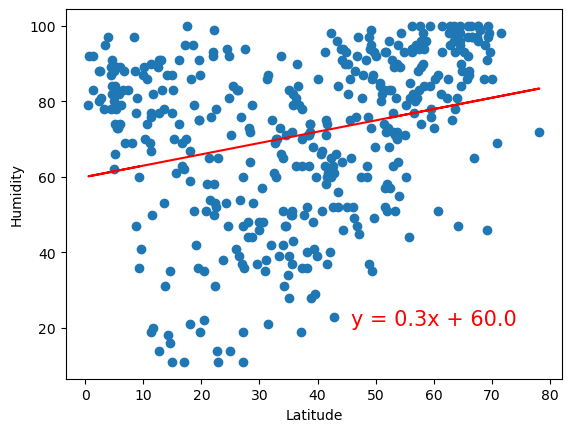

In [44]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(45.8,20.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-value is: 0.06463598135634453
The r-squared is: 0.004177810085897718


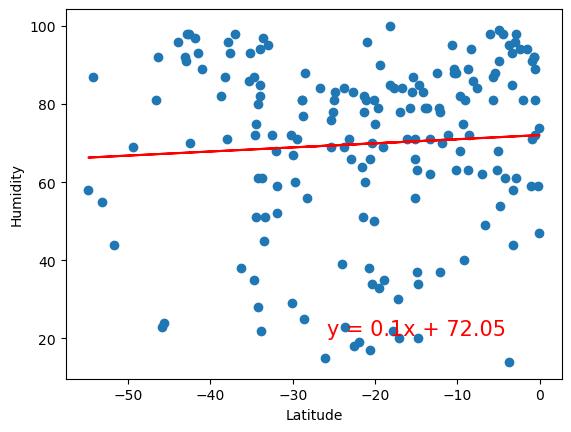

In [45]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
plt.plot(southern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-25.8,20.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 
In both the Northern and Southern Hemispheres, there does not appear to be a relationship between Latitude and Humdity. Looking at the plots, we can see that places with a high Latitude number can have a high Humidity percentage and places with a low Latitude number can also have a high Humidity percentage.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.09539004089947536
The r-squared is: 0.009099259902803582


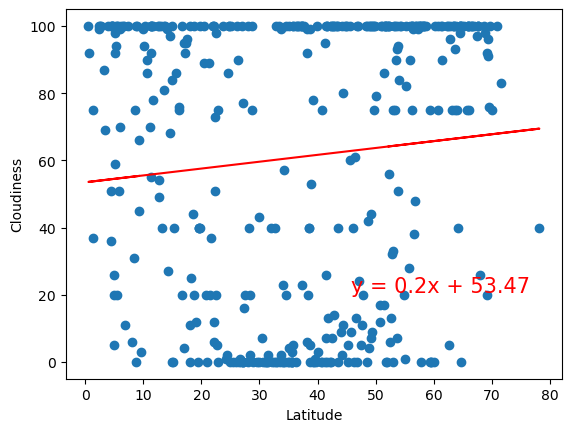

In [46]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(45.8,20.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-value is: 0.26675543488143705
The r-squared is: 0.0711584620387846


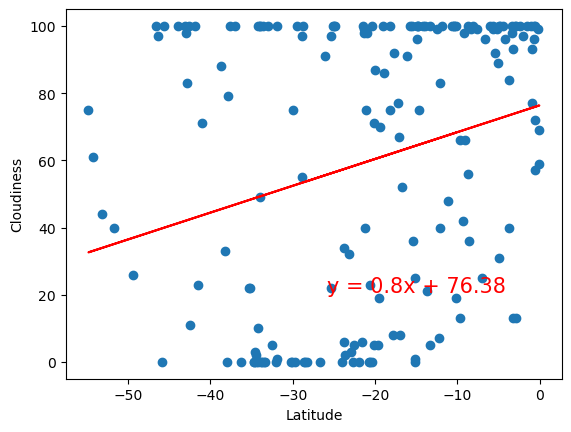

In [47]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
plt.plot(southern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-25.8,20.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 
Looking at both graphs, there does not seem to be a relationship between Latitude and Cloudiness. Looking at 100% cloudiness, we can see multiple plots across the Latitude axis.  

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.06633610720756487
The r-squared is: 0.0044004791194535405


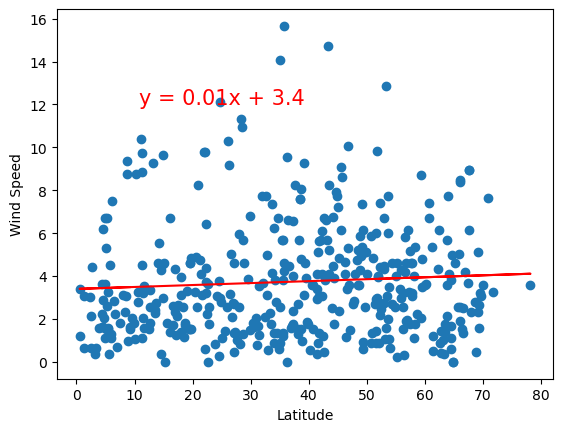

In [48]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
plt.plot(northern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(10.8,12.0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-value is: -0.31920956321262395
The r-squared is: 0.10189474524639416


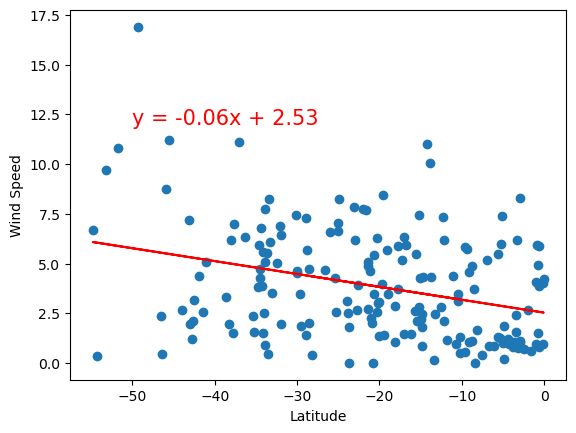

In [49]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
plt.plot(southern_hemi_df['Lat'],regress_values,"r-")
plt.annotate(line_eq,(-50.0,12.0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 
Looking at both graphes, there does not appear to be a relationship between Latitude and Wind Speed. We see high wind speeds reported across different points on the Latitude axis. 